In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import vegas as vg
import pymc3 as pm
from os.path import join
import plotly.express as px

In [2]:
base_fpath = "/media/alexander-fyrogenis/Elements/Οργανοθειικά Ατμόσφαιρα/Διαγράμματα"

In [24]:
sns.set(rc={'figure.figsize':(40,25)})
sns.set(rc={'font.size':20,
            'font.family': 'arial',
           })
sns.set(font_scale = 1.5)

In [4]:
ion_idx = pd.read_csv('Datasets/ion_ids.csv')
df = pd.read_csv(join(base_fpath,'processed_concentrations.csv')).iloc[:,1:]
gdf = pd.read_csv(join(base_fpath, 'grouped_concentrations.csv')).iloc[:,1:]
metdf = pd.read_csv("/media/alexander-fyrogenis/Elements/Οργανοθειικά Ατμόσφαιρα/Data Analysis/Datasets/emep_metrological_data.csv")

Η αντιστοιχία ιόντων - ποσοτικοποιήσεων

In [5]:
ion_idx.head()

,Compound,Group,Molecular ion,Exact mass,Possible precursor,Quantification
0,alkOS139,alkOS,C2H3SO5−,138.9707,Glycolaldehyde,GAS
1,alkOS251,alkOS,C10H19SO5-,251.0961,Alkane,OctS
2,alkOS269,alkOS,C9H17SO7-,269.0700,Alkane,OctS
3,alkOS311,alkOS,C10H1 SO9-,311.0442,Alkane,OctS
4,iOS167,iOS,C4H7SO5−,167.0020,"ΜΑCR, MVK",HAS


Τα δεδομένα σε τελικές συγκεντρώσεις $ng\ m^{-3}$

In [6]:
df.head()

,Sample,Date,PM,Δm,V_amb,C_pm,110.9758,124.9914,139.0071,152.9863,...,296.0446,310.0602,312.0395,312.0759,324.0394,326.0551,328.0708,342.0500,362.1279,382.1177
0,emep_h10_7,2019-01-08,10.0,4.54,632.7,7.175449,0.273688,0.042720,0.065267,0.186086,...,0.060858,0.047732,0.019016,0.035561,0.015494,0.022049,0.024847,0.006399,0.000569,0.000569
1,emep_h10_9,2019-01-09,10.0,8.37,758.1,11.040672,0.068685,0.008483,0.042226,0.070739,...,0.121988,0.068311,0.016354,0.051604,0.012272,0.033052,0.036995,0.020269,0.000475,0.000475
2,emep_h10_10,2019-01-10,10.0,5.60,758.5,7.382720,0.137368,0.025278,0.063490,0.138142,...,0.306369,0.198454,0.047786,0.088991,0.049692,0.095804,0.110280,0.057898,0.000475,0.000475
3,emep_h10_11,2019-01-11,10.0,10.94,759.9,14.397332,0.067731,0.020691,0.027731,0.147402,...,0.203439,0.078423,0.035241,0.134042,0.024338,0.066770,0.071143,0.033067,0.000474,0.000474
4,emep_h10_12,2019-01-12,10.0,19.76,764.0,25.863976,1.562523,0.025335,0.037394,0.346643,...,0.361872,0.139984,0.061599,0.228915,0.024663,0.134198,0.105209,0.038051,0.000471,0.000471


Συγκεντρώσεις ανά ομάδα

In [7]:
gdf.tail()

,Sample,Date,PM,Δm,V_amb,C_pm,alkOS,iOS,iNOS,mtOS,stOS,tmbOS,tmbON,tmbNOS,mtNOS,stNOS,Mixed,ArOS
79,emep_l2.5_338,2019-12-04,2.5,0.283,55.1,5.133321,4.498550,23.163791,0.018512,20.044955,0.204559,0.338784,0.020417,0.013884,9.289955,0.013067,14.823680,0.328278
80,emep_l2.5_339,2019-12-05,2.5,0.325,55.1,5.895157,5.334277,28.034125,0.018512,30.464852,1.446107,0.402715,0.234046,0.013884,47.668302,0.013067,20.081722,1.613505
81,emep_l2.5_340,2019-12-06,2.5,0.327,55.1,5.931435,12.700774,36.858165,0.018512,39.425533,0.346300,0.488418,0.301193,0.013884,84.995202,0.013067,34.960680,2.133162
82,emep_l2.5_341,2019-12-07,2.5,0.487,55.1,8.833666,16.955807,46.772687,0.018512,36.878356,0.192703,0.664082,0.254755,0.013884,35.385638,0.013067,42.755167,1.415755
83,emep_l2.5_342,2019-12-08,2.5,0.464,55.1,8.416470,9.290480,56.165190,0.018512,39.726865,0.381581,0.701974,0.174580,0.013884,14.727923,0.013067,45.892122,0.543299


In [8]:
metdf.head()

,filter id,Day,Date,Δm (mg),Vamb \n(m3),C\nPM (μg/m3),CH3SO3- µg/m3,Cl- (µg/m3),NO2- (µg/m3),Br-(µg/m3),...,NO (µg/m3),NO2 (µg/m3),NOx (µg/m3),SO2 (µg/m3),CO (µg/m3),O3 (µg/m3),WD (°),RH (%),AT (°C),Date/Time
0,emep_l2.5_7,7,07/01/2019,0.254,45.83,5.5,0.003,0.051,0.089,0.002,...,0.054003,1.925318,2.008195,0.200857,173.665396,74.465328,221.234348,71.889583,5.613333,07/01/2019 11:00 PM
1,emep_l2.5_9,9,09/01/2019,0.404,55.11,7.3,0.004,0.046,0.089,0.003,...,0.229431,1.623328,1.975240,0.823573,NaN,71.931634,237.357333,56.373333,5.304667,09/01/2019 11:00 PM
2,emep_l2.5_10,10,10/01/2019,0.273,55.12,5.0,0.005,0.016,0.089,0.002,...,0.052989,1.501199,1.582691,0.423812,NaN,75.253513,149.009524,65.868333,6.225000,10/01/2019 11:00 PM
3,emep_l2.5_11,11,11/01/2019,0.130,55.12,2.4,0.007,0.029,0.089,0.003,...,0.091442,2.419979,2.560013,2.262645,NaN,74.529346,97.570000,75.182917,7.414167,11/01/2019 11:00 PM
4,emep_l2.5_12,12,12/01/2019,0.789,55.12,14.3,0.009,0.060,0.089,0.004,...,0.143662,3.087202,3.307307,1.491446,NaN,75.433932,108.932083,79.187083,6.957083,12/01/2019 11:00 PM


In [9]:
ddf = df.replace(r'\n',' ', regex=True) 
rows = ddf[ddf["PM"] == 2.5].loc[:,"Sample"].tolist()
atmospheric_params = metdf.iloc[:,6:].iloc[:,:-3].columns
atmospheric_params

Index(['CH3SO3- µg/m3', 'Cl- (µg/m3)', 'NO2- (µg/m3)', 'Br-(µg/m3)',
       'NO3- (µg/m3)', 'SO42- (µg/m3)', 'C2O42- (µg/m3)', 'Na+ (µg/m3)',
       'NH4+ (µg/m3)', 'K+ (µg/m3)', 'Mg2+ (µg/m3)', 'Ca2+ (µg/m3)',
       'PO43- (µg/m3)', 'OC (μgC/m3)', 'EC (μgC/m3)', 'TC (μgC/m3)',
       'NO (µg/m3)', 'NO2 (µg/m3)', 'NOx (µg/m3)', 'SO2 (µg/m3)', 'CO (µg/m3)',
       'O3 (µg/m3)', 'WD (°)'],
      dtype='object')

In [10]:
_ = metdf[metdf["filter id"].isin(rows)].iloc[:,6:]
pm25 = df[df["PM"] == 2.5]
pm10 = df[df["PM"] == 10.0]
d1 = pd.concat([
    pm10.iloc[:,:6].reset_index(),
    metdf[metdf["filter id"].isin(rows)].iloc[:,6:].reset_index(),
    pm10.iloc[:,6:].reset_index()
], axis = 1)
d2 = pd.concat([
    pm25.iloc[:,:6].reset_index(),
    metdf[metdf["filter id"].isin(rows)].iloc[:,6:].reset_index(),
    pm25.iloc[:,6:].reset_index()
], axis = 1)
d3 = pd.concat([d1,d2])
d3.drop(["index"],inplace = True,axis=1)
d3.reset_index(inplace = True)
d3 = d3.iloc[:,1:]
d3

,Sample,Date,PM,Δm,V_amb,C_pm,CH3SO3- µg/m3,Cl- (µg/m3),NO2- (µg/m3),Br-(µg/m3),...,296.0446,310.0602,312.0395,312.0759,324.0394,326.0551,328.0708,342.0500,362.1279,382.1177
0,emep_h10_7,2019-01-08,10.0,4.540,632.7,7.175449,0.003,0.051,0.089,0.002,...,0.060858,0.047732,0.019016,0.035561,0.015494,0.022049,0.024847,0.006399,0.000569,0.000569
1,emep_h10_9,2019-01-09,10.0,8.370,758.1,11.040672,0.004,0.046,0.089,0.003,...,0.121988,0.068311,0.016354,0.051604,0.012272,0.033052,0.036995,0.020269,0.000475,0.000475
2,emep_h10_10,2019-01-10,10.0,5.600,758.5,7.382720,0.005,0.016,0.089,0.002,...,0.306369,0.198454,0.047786,0.088991,0.049692,0.095804,0.110280,0.057898,0.000475,0.000475
3,emep_h10_11,2019-01-11,10.0,10.940,759.9,14.397332,0.007,0.029,0.089,0.003,...,0.203439,0.078423,0.035241,0.134042,0.024338,0.066770,0.071143,0.033067,0.000474,0.000474
4,emep_h10_12,2019-01-12,10.0,19.760,764.0,25.863976,0.009,0.060,0.089,0.004,...,0.361872,0.139984,0.061599,0.228915,0.024663,0.134198,0.105209,0.038051,0.000471,0.000471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,emep_l2.5_338,2019-12-04,2.5,0.283,55.1,5.133321,0.031,0.016,0.161,0.003,...,0.298973,0.747956,0.282899,0.411322,0.473755,0.375210,0.285508,0.006534,0.006534,0.006534
80,emep_l2.5_339,2019-12-05,2.5,0.325,55.1,5.895157,0.014,0.048,0.089,0.004,...,1.374135,1.645025,0.553529,0.878264,0.689556,1.021195,0.935401,1.945217,0.006534,0.006534
81,emep_l2.5_340,2019-12-06,2.5,0.327,55.1,5.931435,0.009,0.016,0.089,0.003,...,23.155553,1.844546,0.708274,0.621339,0.923271,1.220857,0.875184,0.627186,0.006534,0.006534
82,emep_l2.5_341,2019-12-07,2.5,0.487,55.1,8.833666,0.009,0.016,0.089,0.003,...,0.753978,1.257072,0.574791,0.674332,0.688025,0.826739,0.798709,0.006534,0.006534,0.006534


Ο τελικός συγκεντρωτικός πίνακας με όλα τα στοιχεία

In [11]:
d3.head()

,Sample,Date,PM,Δm,V_amb,C_pm,CH3SO3- µg/m3,Cl- (µg/m3),NO2- (µg/m3),Br-(µg/m3),...,296.0446,310.0602,312.0395,312.0759,324.0394,326.0551,328.0708,342.0500,362.1279,382.1177
0,emep_h10_7,2019-01-08,10.0,4.54,632.7,7.175449,0.003,0.051,0.089,0.002,...,0.060858,0.047732,0.019016,0.035561,0.015494,0.022049,0.024847,0.006399,0.000569,0.000569
1,emep_h10_9,2019-01-09,10.0,8.37,758.1,11.040672,0.004,0.046,0.089,0.003,...,0.121988,0.068311,0.016354,0.051604,0.012272,0.033052,0.036995,0.020269,0.000475,0.000475
2,emep_h10_10,2019-01-10,10.0,5.60,758.5,7.382720,0.005,0.016,0.089,0.002,...,0.306369,0.198454,0.047786,0.088991,0.049692,0.095804,0.110280,0.057898,0.000475,0.000475
3,emep_h10_11,2019-01-11,10.0,10.94,759.9,14.397332,0.007,0.029,0.089,0.003,...,0.203439,0.078423,0.035241,0.134042,0.024338,0.066770,0.071143,0.033067,0.000474,0.000474
4,emep_h10_12,2019-01-12,10.0,19.76,764.0,25.863976,0.009,0.060,0.089,0.004,...,0.361872,0.139984,0.061599,0.228915,0.024663,0.134198,0.105209,0.038051,0.000471,0.000471


<AxesSubplot:>

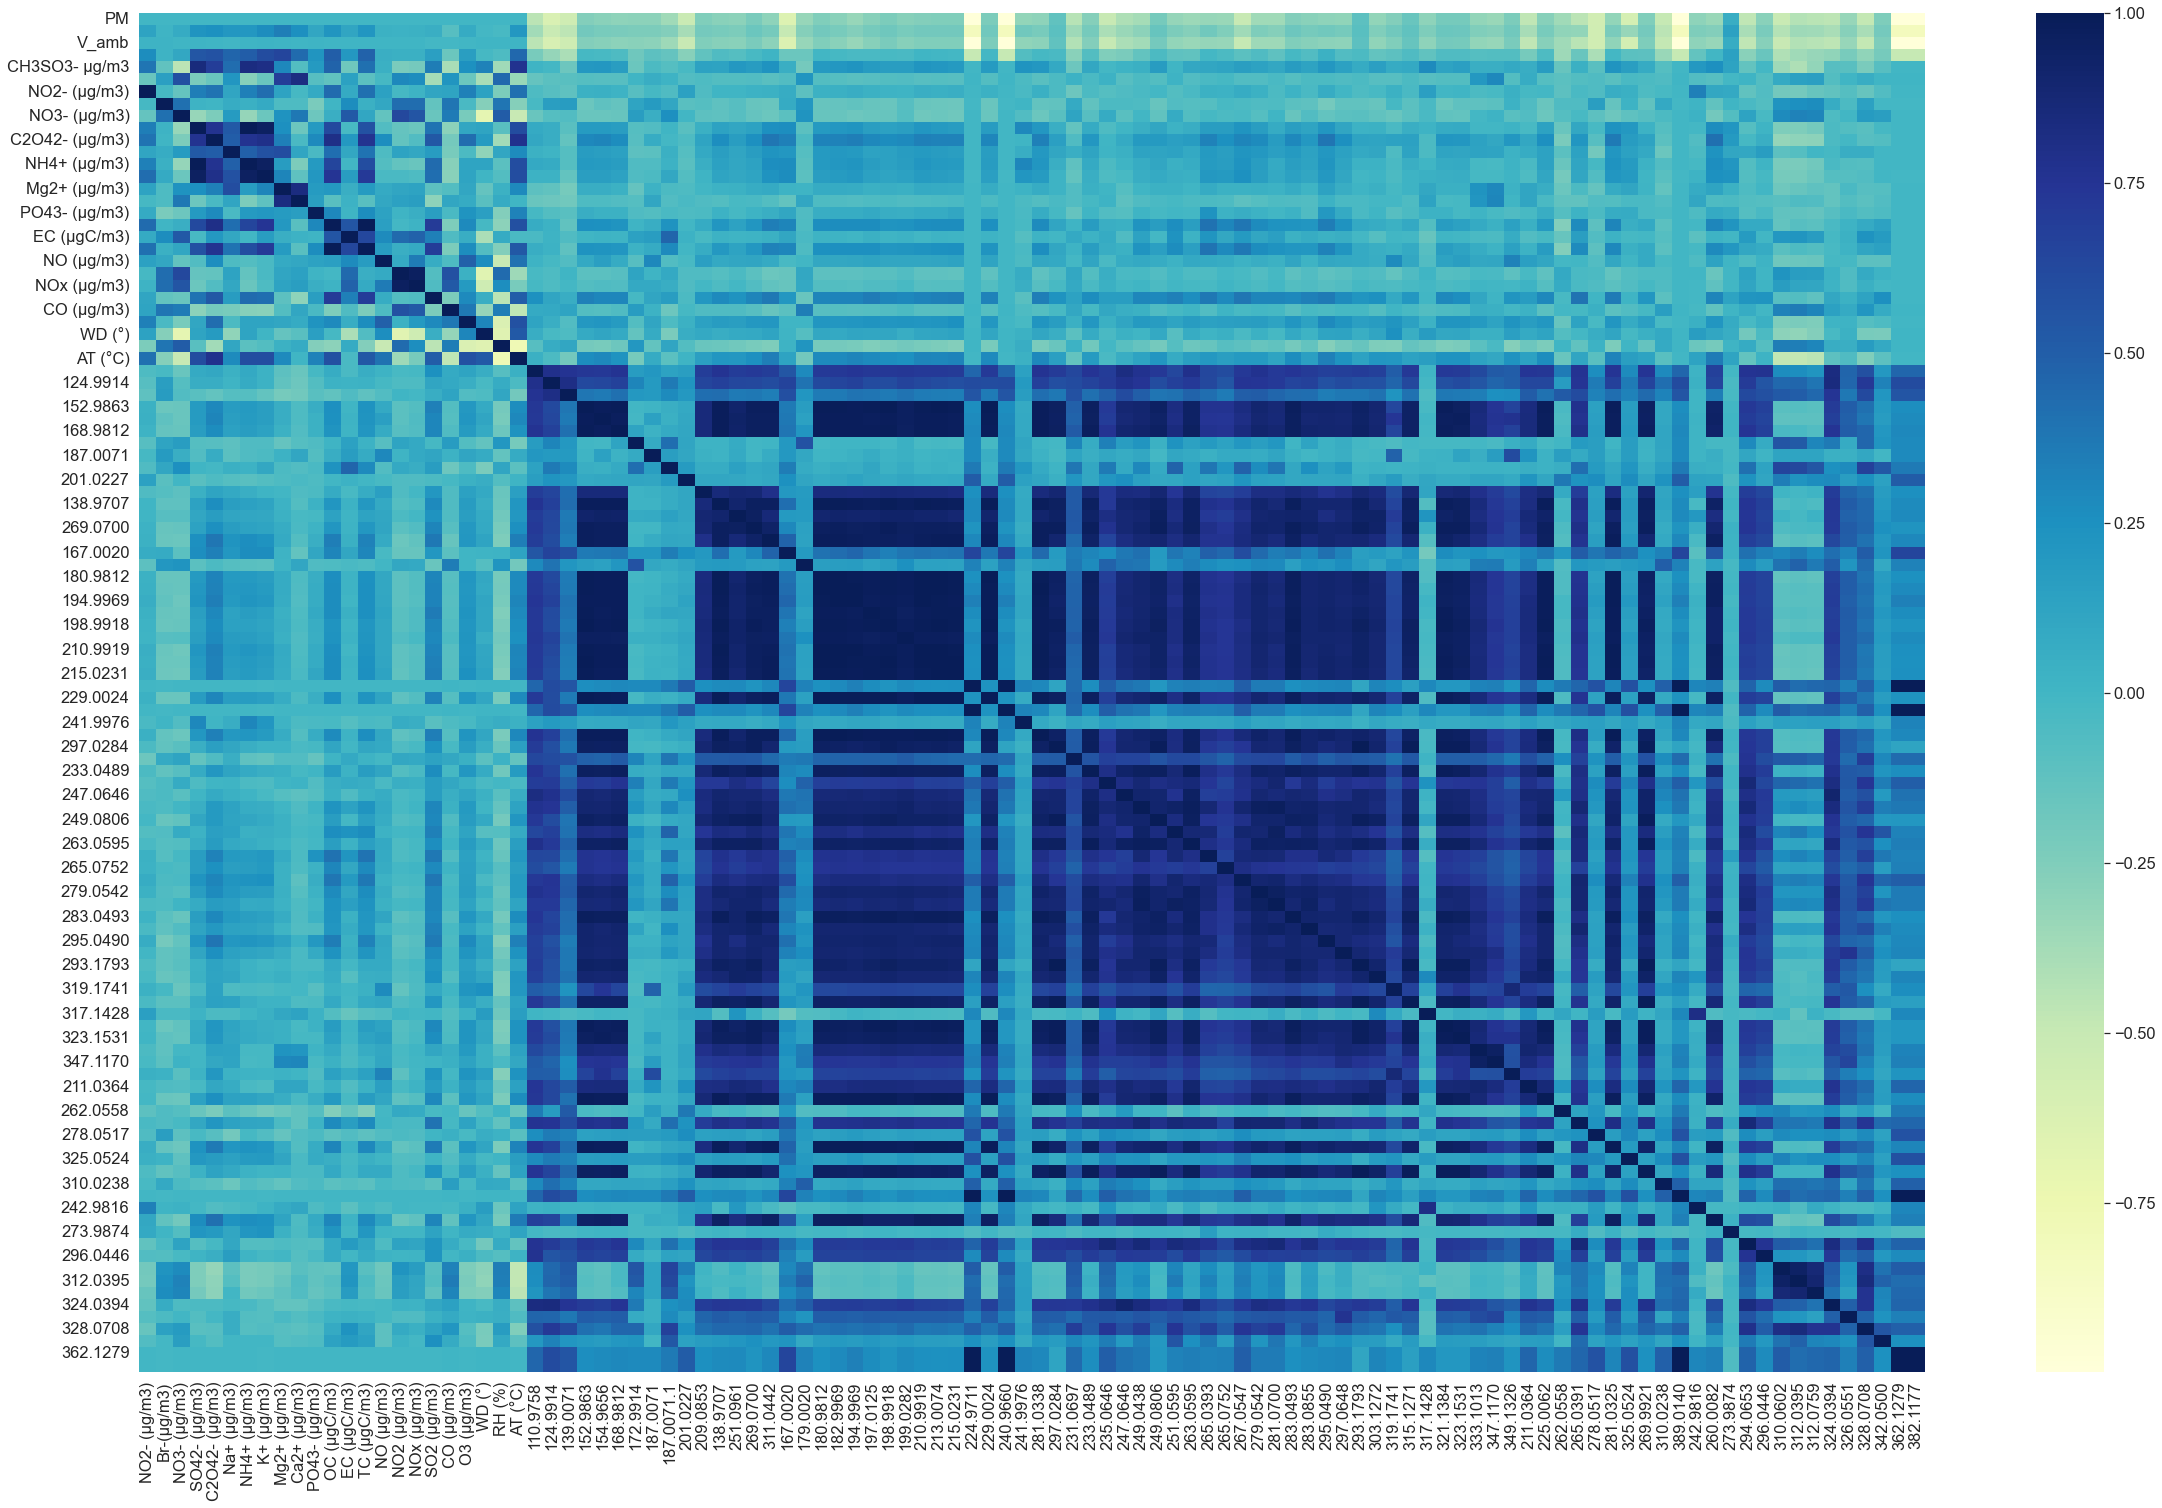

In [25]:
sns.heatmap(d3.corr().iloc[:,6:],cmap = "YlGnBu")

In [13]:
# b1 = pd.IntervalIndex.from_tuples([(0,5),(6,11),(12,17),(18,23),(24,29),(30,35)])
# b2 = pd.IntervalIndex.from_tuples([(0,10),(11,21),(22,32),(33,43),(44,54),(55,65),(66,76),(77,87),(88,98),(99,100)])
b1 = [0,5,10,15,20,25,30,35,40,45,50,55]
b2 = [0,10,20,30,40,50,60,70,80,90,100]
t_binned = pd.cut(d3.loc[:,'AT (°C)'], bins=b1, labels = [0,5,10,15,20,25,30,35,40,45,50])
rh_binned = pd.cut(d3.loc[:,r'RH (%)'], bins=b2, labels = [0,10,20,30,40,50,60,70,80,90] )
grouped_sums_temp = pd.DataFrame()
for tbin in t_binned.unique():
    s = d3.iloc[t_binned[t_binned == tbin].index,:].loc[:,atmospheric_params].mean()
    s['Temp_Bin_Upper'] = tbin
    d4 = pd.DataFrame(data = [s], columns = s.index)
    grouped_sums_temp = pd.concat([grouped_sums_temp,d4],axis = 0)
grouped_sums_temp.reset_index(inplace = True)
grouped_sums_temp.drop("index",axis=1,inplace = True)
grouped_sums_temp

,CH3SO3- µg/m3,Cl- (µg/m3),NO2- (µg/m3),Br-(µg/m3),NO3- (µg/m3),SO42- (µg/m3),C2O42- (µg/m3),Na+ (µg/m3),NH4+ (µg/m3),K+ (µg/m3),...,EC (μgC/m3),TC (μgC/m3),NO (µg/m3),NO2 (µg/m3),NOx (µg/m3),SO2 (µg/m3),CO (µg/m3),O3 (µg/m3),WD (°),Temp_Bin_Upper
0,0.006267,0.063333,0.089467,0.003200,0.402733,2.191800,0.0934,0.129133,0.808400,0.082467,...,0.188267,1.341933,0.176774,2.678942,2.950323,0.763450,189.267508,78.274670,168.408235,5.0
1,0.072700,0.021200,0.190600,0.002800,0.162200,6.064000,0.2292,0.183100,2.069100,0.172600,...,0.118900,1.750800,0.207059,2.076956,2.373846,1.106348,133.484246,85.616721,224.684833,20.0
2,0.110000,0.016000,0.103000,0.003000,0.097000,12.262000,0.1780,0.180000,4.350000,0.267000,...,0.083000,1.346000,0.190233,2.827412,3.117484,0.499368,140.142763,84.379184,221.387083,15.0
3,0.050900,0.021500,0.163300,0.002600,0.084600,5.287100,0.2832,0.138000,1.890700,0.151200,...,0.194700,2.368200,0.366578,2.013728,2.574361,1.759437,148.785797,114.740065,241.390900,25.0
4,0.015500,0.021333,0.108667,0.003167,0.151000,2.146833,0.0690,0.087667,0.798167,0.068000,...,0.112167,0.805333,0.231444,2.431786,2.786890,0.836467,161.565427,79.061999,201.976806,10.0


In [14]:
grouped_sums_rh = pd.DataFrame()
for rbin in rh_binned.unique():
    s = d3.iloc[rh_binned[rh_binned == rbin].index,:].loc[:,atmospheric_params].mean()
    s['Rh_Bin_Upper'] = rbin
    d4 = pd.DataFrame(data = [s], columns = s.index)
    grouped_sums_rh = pd.concat([grouped_sums_rh,d4],axis = 0)
grouped_sums_rh.reset_index(inplace = True)
grouped_sums_rh.drop("index",axis=1,inplace = True)
grouped_sums_rh

,CH3SO3- µg/m3,Cl- (µg/m3),NO2- (µg/m3),Br-(µg/m3),NO3- (µg/m3),SO42- (µg/m3),C2O42- (µg/m3),Na+ (µg/m3),NH4+ (µg/m3),K+ (µg/m3),...,EC (μgC/m3),TC (μgC/m3),NO (µg/m3),NO2 (µg/m3),NOx (µg/m3),SO2 (µg/m3),CO (µg/m3),O3 (µg/m3),WD (°),Rh_Bin_Upper
0,0.013417,0.053500,0.099083,0.003417,0.367917,2.749417,0.115750,0.131333,1.011500,0.096667,...,0.170417,1.295417,0.193622,2.618341,2.915777,0.670797,184.439822,81.043986,176.920328,70.0
1,0.051000,0.019875,0.153500,0.002500,0.166625,3.785875,0.127000,0.161375,1.307750,0.118250,...,0.110250,1.352500,0.225380,2.263354,2.608382,1.089905,143.685986,91.940104,212.985135,50.0
2,0.050833,0.019417,0.152583,0.002917,0.109833,6.035917,0.195833,0.140167,2.116417,0.158333,...,0.123167,1.635083,0.189079,2.092574,2.365252,1.138065,148.414772,81.449403,205.925429,60.0
3,0.006500,0.155000,0.089000,0.003500,0.693000,2.488000,0.148000,0.180000,0.782000,0.108000,...,0.366000,2.052000,0.233218,4.170830,4.527604,0.986609,180.075225,70.541499,109.743036,80.0
4,0.050000,0.025500,0.123750,0.002500,0.154250,4.323250,0.245750,0.142750,1.553500,0.117750,...,0.142000,1.928750,0.230645,1.803591,2.160404,1.772906,150.985873,108.600641,258.312509,40.0
5,0.035250,0.018750,0.178750,0.002750,0.110750,3.387750,0.270750,0.093500,1.272000,0.114250,...,0.252750,2.423000,0.549816,2.063666,2.901239,1.511175,138.325454,118.878007,267.340625,30.0


In [15]:
def bin_col(df:pd.DataFrame, bins:list,labels:list,target:str,cols_to_sum:pd.Index)->pd.DataFrame:
    '''
    Bins a specified column, with specified bins and labels, and returns a dataframe with all
    the cols_to_sum variable averaged withing each bin
    
    Arguements:
    
    - df: The DataFrame of intrest
    - bins: A list of bins
    - labels: A list of labels. Must be smaller the the number of outer edges of the bins
    - target: The column of the original df to be binned
    - cols_to_sum: The columns of the dataframe to be summed within the beans
    
    Returns:
    pd.DataFrame: A dataframe with cols_to_sum columns and number of bins rows
    '''
    binned = pd.cut(df.loc[:,target], bins=bins, labels = labels)
    grouped_sums = pd.DataFrame()
    for abin in binned.unique():
        s = df.iloc[binned[binned == abin].index,:].loc[:,cols_to_sum].mean()
        s[f'{target}_bin_upper'] = abin
        d = pd.DataFrame(data = [s], columns = s.index)
        grouped_sums = pd.concat([grouped_sums,d],axis = 0)
    grouped_sums.reset_index(inplace = True)
    grouped_sums.drop("index",axis=1,inplace = True)
    return grouped_sums.set_index(f"{target}_bin_upper")


In [16]:
T_avgs = bin_col(d3,b1,b1[1:],"AT (°C)",atmospheric_params)

In [17]:
Rh_avgs = bin_col(d3,b2,b2[1:],r'RH (%)',atmospheric_params)

In [18]:
Rh_avgs

,CH3SO3- µg/m3,Cl- (µg/m3),NO2- (µg/m3),Br-(µg/m3),NO3- (µg/m3),SO42- (µg/m3),C2O42- (µg/m3),Na+ (µg/m3),NH4+ (µg/m3),K+ (µg/m3),...,OC (μgC/m3),EC (μgC/m3),TC (μgC/m3),NO (µg/m3),NO2 (µg/m3),NOx (µg/m3),SO2 (µg/m3),CO (µg/m3),O3 (µg/m3),WD (°)
RH (%)_bin_upper,,,,,,,,,,,,,,,,,,,,,
80.0,0.013417,0.053500,0.099083,0.003417,0.367917,2.749417,0.115750,0.131333,1.011500,0.096667,...,1.142083,0.170417,1.295417,0.193622,2.618341,2.915777,0.670797,184.439822,81.043986,176.920328
60.0,0.051000,0.019875,0.153500,0.002500,0.166625,3.785875,0.127000,0.161375,1.307750,0.118250,...,1.246500,0.110250,1.352500,0.225380,2.263354,2.608382,1.089905,143.685986,91.940104,212.985135
70.0,0.050833,0.019417,0.152583,0.002917,0.109833,6.035917,0.195833,0.140167,2.116417,0.158333,...,1.512000,0.123167,1.635083,0.189079,2.092574,2.365252,1.138065,148.414772,81.449403,205.925429
90.0,0.006500,0.155000,0.089000,0.003500,0.693000,2.488000,0.148000,0.180000,0.782000,0.108000,...,1.686000,0.366000,2.052000,0.233218,4.170830,4.527604,0.986609,180.075225,70.541499,109.743036
50.0,0.050000,0.025500,0.123750,0.002500,0.154250,4.323250,0.245750,0.142750,1.553500,0.117750,...,1.786500,0.142000,1.928750,0.230645,1.803591,2.160404,1.772906,150.985873,108.600641,258.312509
40.0,0.035250,0.018750,0.178750,0.002750,0.110750,3.387750,0.270750,0.093500,1.272000,0.114250,...,2.170000,0.252750,2.423000,0.549816,2.063666,2.901239,1.511175,138.325454,118.878007,267.340625


In [19]:
cor_df = pd.concat([d3.iloc[:,[19,20]],d3.iloc[:,32:]],axis=1)
corrs = cor_df.corr()
corrs = corrs.iloc[:2,2:].T
corrs

,OC (μgC/m3),EC (μgC/m3)
110.9758,0.064878,-0.035998
124.9914,0.024500,0.019603
139.0071,-0.129383,-0.054061
152.9863,0.256537,0.007882
154.9656,0.243611,0.022393
...,...,...
326.0551,0.018164,0.039335
328.0708,0.086011,0.241664
342.0500,0.134094,0.180255
362.1279,-0.005735,-0.005502


<AxesSubplot:>

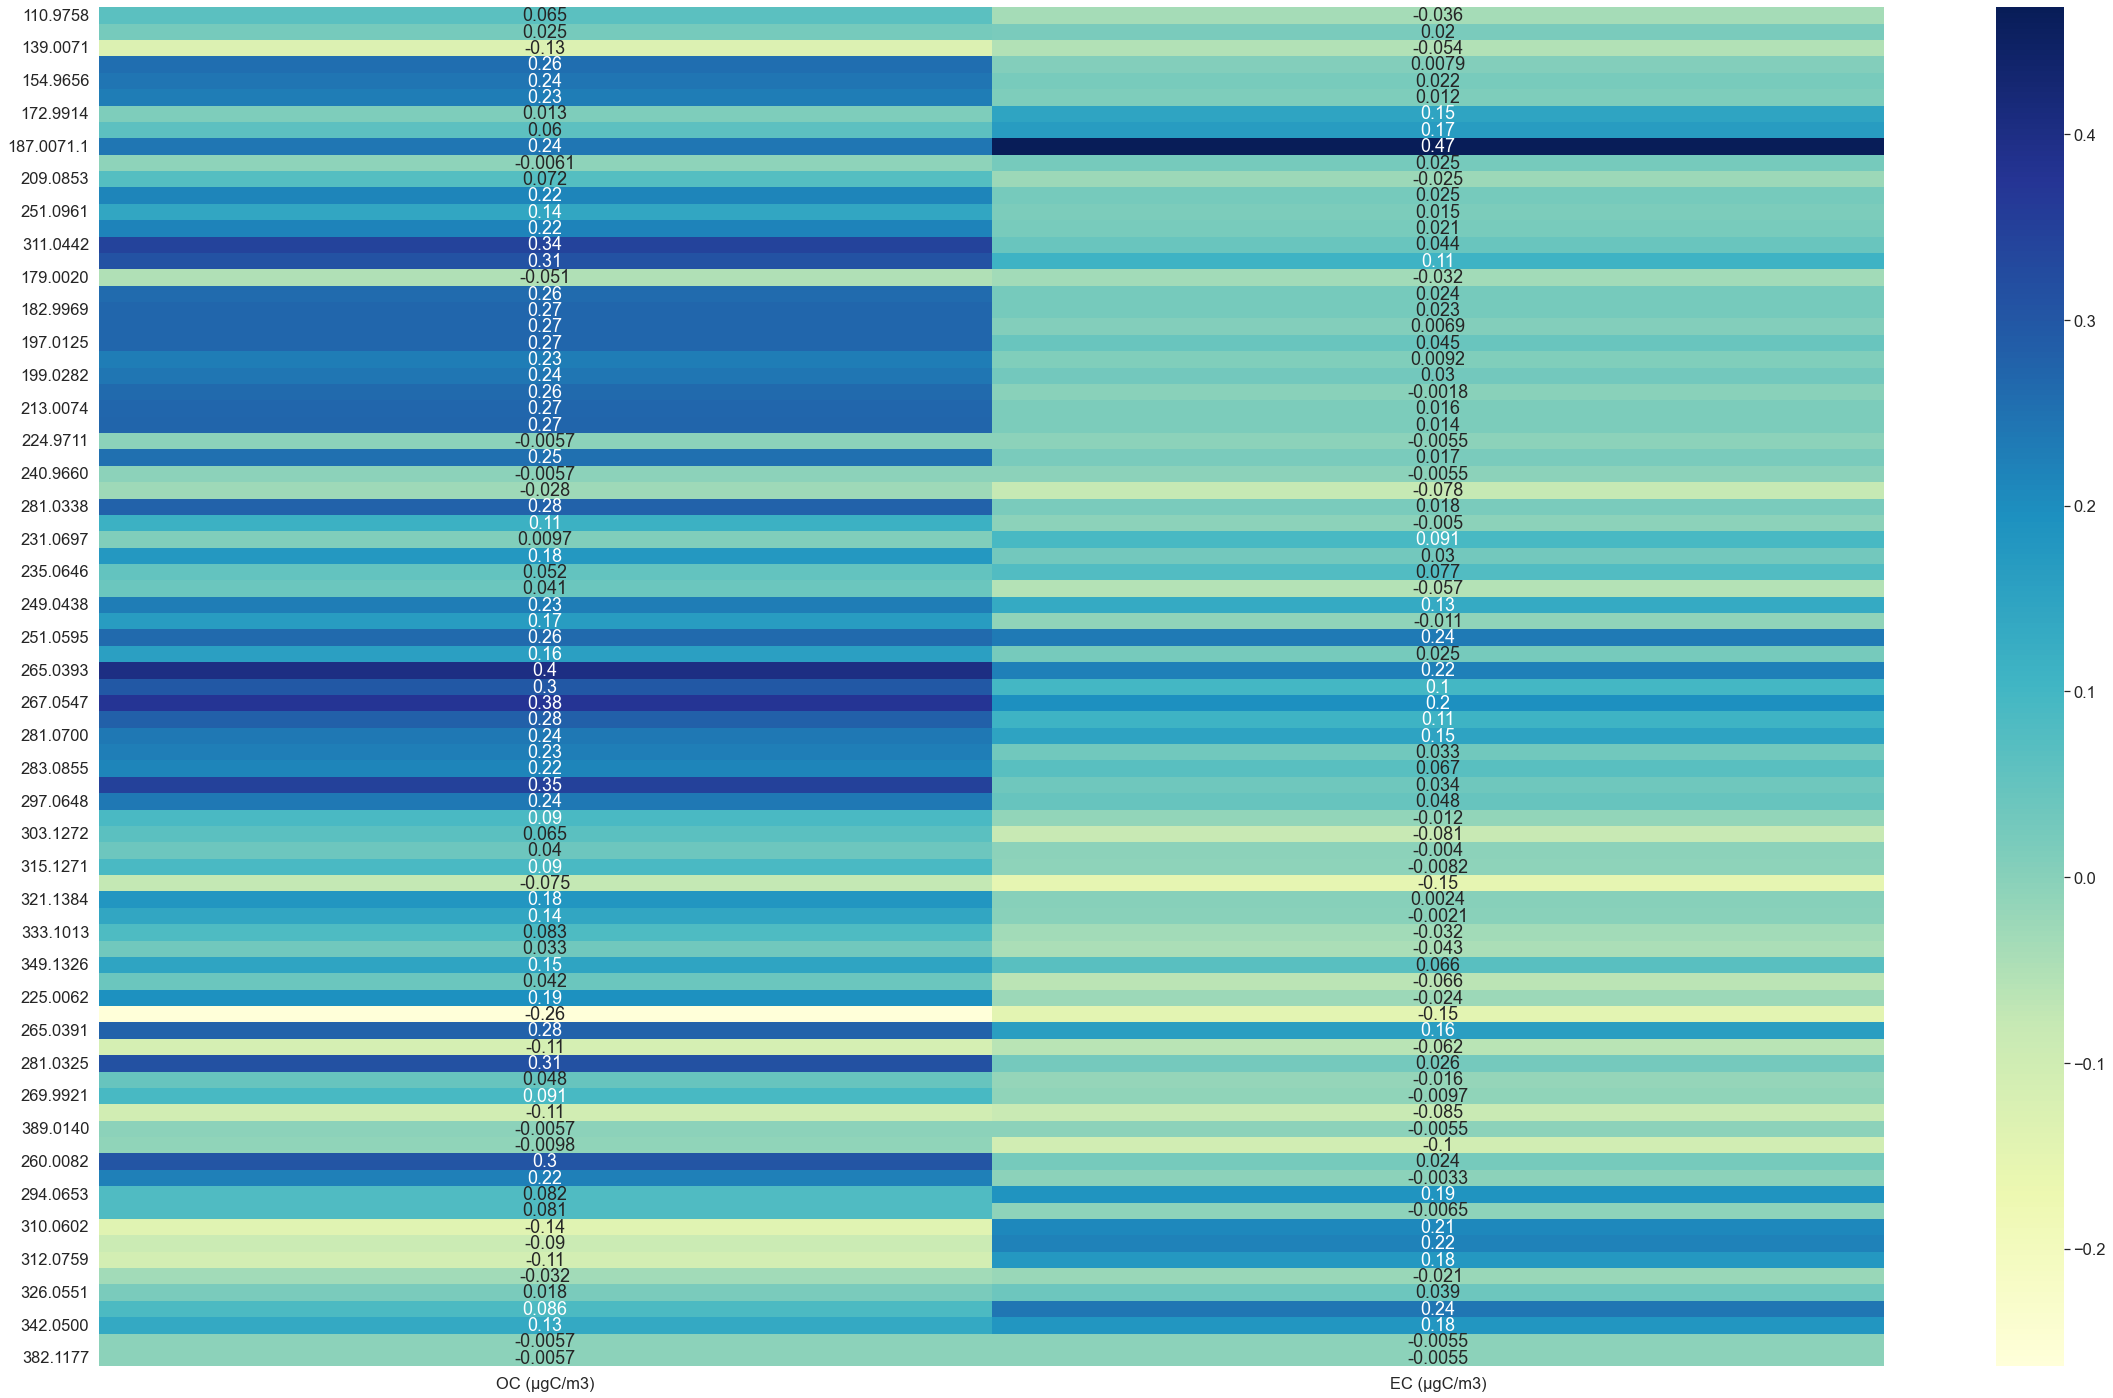

In [26]:
sns.heatmap(corrs,cmap = "YlGnBu", annot=True)

In [21]:
d3.loc[:,'WD (°)']

0     221.234348
1     237.357333
2     149.009524
3      97.570000
4     108.932083
         ...    
79    244.709583
80    154.771667
81    169.382083
82    240.880000
83    218.567500
Name: WD (°), Length: 84, dtype: float64

In [22]:
w_bins = [0,45,90,135,180,225,270,315,360]
w_labels = ['N','NE', 'E', 'SE', 'S', 'SW', 'W','NW']
winds = pd.cut(d3.loc[:,'WD (°)'], bins = w_bins, labels = w_labels)
d3.loc[:,'Διεύθυνση Αέρα'] = winds
d3

,Sample,Date,PM,Δm,V_amb,C_pm,CH3SO3- µg/m3,Cl- (µg/m3),NO2- (µg/m3),Br-(µg/m3),...,310.0602,312.0395,312.0759,324.0394,326.0551,328.0708,342.0500,362.1279,382.1177,Διεύθυνση Αέρα
0,emep_h10_7,2019-01-08,10.0,4.540,632.7,7.175449,0.003,0.051,0.089,0.002,...,0.047732,0.019016,0.035561,0.015494,0.022049,0.024847,0.006399,0.000569,0.000569,S
1,emep_h10_9,2019-01-09,10.0,8.370,758.1,11.040672,0.004,0.046,0.089,0.003,...,0.068311,0.016354,0.051604,0.012272,0.033052,0.036995,0.020269,0.000475,0.000475,SW
2,emep_h10_10,2019-01-10,10.0,5.600,758.5,7.382720,0.005,0.016,0.089,0.002,...,0.198454,0.047786,0.088991,0.049692,0.095804,0.110280,0.057898,0.000475,0.000475,SE
3,emep_h10_11,2019-01-11,10.0,10.940,759.9,14.397332,0.007,0.029,0.089,0.003,...,0.078423,0.035241,0.134042,0.024338,0.066770,0.071143,0.033067,0.000474,0.000474,E
4,emep_h10_12,2019-01-12,10.0,19.760,764.0,25.863976,0.009,0.060,0.089,0.004,...,0.139984,0.061599,0.228915,0.024663,0.134198,0.105209,0.038051,0.000471,0.000471,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,emep_l2.5_338,2019-12-04,2.5,0.283,55.1,5.133321,0.031,0.016,0.161,0.003,...,0.747956,0.282899,0.411322,0.473755,0.375210,0.285508,0.006534,0.006534,0.006534,SW
80,emep_l2.5_339,2019-12-05,2.5,0.325,55.1,5.895157,0.014,0.048,0.089,0.004,...,1.645025,0.553529,0.878264,0.689556,1.021195,0.935401,1.945217,0.006534,0.006534,SE
81,emep_l2.5_340,2019-12-06,2.5,0.327,55.1,5.931435,0.009,0.016,0.089,0.003,...,1.844546,0.708274,0.621339,0.923271,1.220857,0.875184,0.627186,0.006534,0.006534,SE
82,emep_l2.5_341,2019-12-07,2.5,0.487,55.1,8.833666,0.009,0.016,0.089,0.003,...,1.257072,0.574791,0.674332,0.688025,0.826739,0.798709,0.006534,0.006534,0.006534,SW


In [74]:
d5 = d3.groupby(by = "Διεύθυνση Αέρα").sum().loc[:,'WD (°)']
fig = px.bar_polar(r = d5, theta = w_labels ,
                   color_discrete_sequence= px.colors.sequential.solar_r,title = "Διεύθυνση Ανέμου",
                   width = 1080, height = 720
          )

<img src='./rose_plot.png'></img>